In [ ]:
from nbdev.imports import *
from fastcore.script import *
from fastcore.utils import *
from fastcore.foundation import *
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum, auto
%matplotlib qt

In [ ]:
def create_voxelarray(array, exclude=(Blocks.air,)):
    x, y, z = np.indices(array.shape)
    # assemble the blocks
    block_list = []
    for block in Blocks:
        if block in exclude:
            block_list.append(np.zeros(array.shape, dtype=bool))
        else:
            block_list.append(array[x, y, z] == block)
        print(block, block_list[-1].sum())
    voxelarray = reduce(operator.or_, block_list)
    return voxelarray, block_list

In [ ]:
def show_voxelarray(voxelarray, block_list, exclude=(Blocks.air,)):
    "create a color array based the `block_list` list and then show it"
    colors = np.empty(voxelarray.shape, dtype=object)
    for block_array, block in zip(block_list, Blocks):
        print(block, block_array.sum())
        colors[block_array] = block_colors[block]

    # plot
    ax = plt.figure().add_subplot(projection='3d')
    ax.voxels(voxelarray, facecolors=colors)
    plt.show()

In [ ]:
# I need to figure out a good way to represent the data


class Blocks(Enum):
    air = 0
    oak_leave = 1
    oak_log = 2
    grass = 3


block_colors = {Blocks.oak_leave: "#84AE09", Blocks.oak_log: "#806517",
                Blocks.grass: "#477A1E", Blocks.air: "#000"}

# create the 6x7x7 array of the tree
lea = Blocks.oak_leave
log = Blocks.oak_log
gra = Blocks.grass
air = Blocks.air
tree = np.array([[[air, air, air, air, air, air, air],
                  [air, air, air, air, air, air, air],
                  [air, air, air, lea, air, air, air],
                  [air, air, lea, lea, lea, air, air],
                  [air, air, air, lea, air, air, air],
                  [air, air, air, air, air, air, air],
                  [air, air, air, air, air, air, air]],
                 [[air, air, air, air, air, air, air],
                  [air, air, air, air, air, air, air],
                  [air, air, lea, lea, lea, air, air],
                  [air, air, lea, log, lea, air, air],
                  [air, air, lea, lea, lea, air, air],
                  [air, air, air, air, air, air, air],
                  [air, air, air, air, air, air, air]],
                 [[air, air, air, air, air, air, air],
                  [air, air, lea, lea, lea, air, air],
                  [air, lea, lea, lea, lea, lea, air],
                  [air, lea, lea, log, lea, lea, air],
                  [air, lea, lea, lea, lea, lea, air],
                  [air, air, lea, lea, lea, air, air],
                  [air, air, air, air, air, air, air]],
                 [[air, air, air, air, air, air, air],
                  [air, air, air, air, air, air, air],
                  [air, air, air, air, air, air, air],
                  [air, air, air, log, air, air, air],
                  [air, air, air, air, air, air, air],
                  [air, air, air, air, air, air, air],
                  [air, air, air, air, air, air, air]],
                 [[air, air, air, air, air, air, air],
                  [air, air, air, air, air, air, air],
                  [air, air, air, air, air, air, air],
                  [air, air, air, log, air, air, air],
                  [air, air, air, air, air, air, air],
                  [air, air, air, air, air, air, air],
                  [air, air, air, air, air, air, air]],
                 [[gra, gra, gra, gra, gra, gra, gra],
                  [gra, gra, gra, gra, gra, gra, gra],
                  [gra, gra, gra, gra, gra, gra, gra],
                  [gra, gra, gra, gra, gra, gra, gra],
                  [gra, gra, gra, gra, gra, gra, gra],
                  [gra, gra, gra, gra, gra, gra, gra],
                  [gra, gra, gra, gra, gra, gra, gra]]])

tree = tree.T[..., ::-1]
tree.shape

(7, 7, 6)

Blocks.air 0
Blocks.oak_leave 33
Blocks.oak_log 4
Blocks.grass 49
Blocks.air 0
Blocks.oak_leave 33
Blocks.oak_log 4
Blocks.grass 49


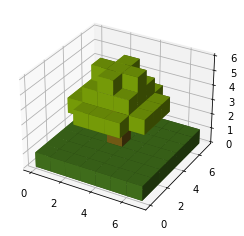

In [ ]:
# it should display a small tree on grass
%matplotlib inline
show_voxelarray(*create_voxelarray(tree))